# 

In [1]:
import matplotlib.pyplot as plt
import random
import cv2
import torch
import os
import sys
sys.path.append('/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/detectron2')
import detectron2
!nvcc --version
from detectron2.utils.visualizer import Visualizer
import tifffile



nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Nov_22_10:17:15_PST_2023
Cuda compilation tools, release 12.3, V12.3.107
Build cuda_12.3.r12.3/compiler.33567101_0


In [2]:
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn/train/annotations/instances_train7.json", "/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn/train/images")
register_coco_instances("my_dataset_val", {}, "/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn/val/annotations/instances_val7.json", "/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn/val/images")
# Get metadata for your dataset
metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")
print(dataset_dicts[0])

{'file_name': '/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/notebooks_and_tools/oc_MRCNN_format/oc_mrcnn/train/images/7837835140118832722.png', 'height': 256, 'width': 256, 'image_id': '0', 'annotations': [{'iscrowd': 0, 'bbox': [232.0, 172.0, 16.0, 32.0], 'category_id': 0, 'segmentation': [[237.0, 187.0, 237.0, 186.0, 236.0, 185.0, 235.0, 183.0, 236.0, 184.0, 234.0, 181.0, 235.0, 182.0, 234.0, 180.0, 233.0, 178.0, 232.0, 176.0, 234.0, 179.0, 233.0, 177.0, 232.0, 175.0, 232.0, 174.0, 232.0, 173.0, 233.0, 173.0, 233.0, 172.0, 234.0, 172.0, 235.0, 173.0, 235.0, 172.0, 236.0, 174.0, 236.0, 173.0, 237.0, 176.0, 237.0, 175.0, 238.0, 178.0, 238.0, 177.0, 239.0, 181.0, 239.0, 180.0, 239.0, 179.0, 240.0, 182.0, 240.0, 183.0, 241.0, 184.0, 241.0, 185.0, 242.0, 186.0, 242.0, 187.0, 242.0, 188.0, 243.0, 189.0, 243.0, 190.0, 244.0, 191.0, 244.0, 192.0, 245.0, 193.0, 245.0, 194.0, 246.0, 196.0, 245.0, 195.0, 247.0, 198.0, 246.0, 197.0, 248.0, 200.0, 247.0, 199.0, 248.0, 201.0, 248.

Displaying: 7862199115443974280.png
Displaying: 3387442781408645390.png
Displaying: 4483980061312485181.png
Displaying: 746920955013902486.png
Displaying: 601577881159823693.png
Displaying: 6871094641553411977.png
Displaying: 8226293628555659034.png
Displaying: 1922612370829757031.png
Displaying: 3854804698685278475.png


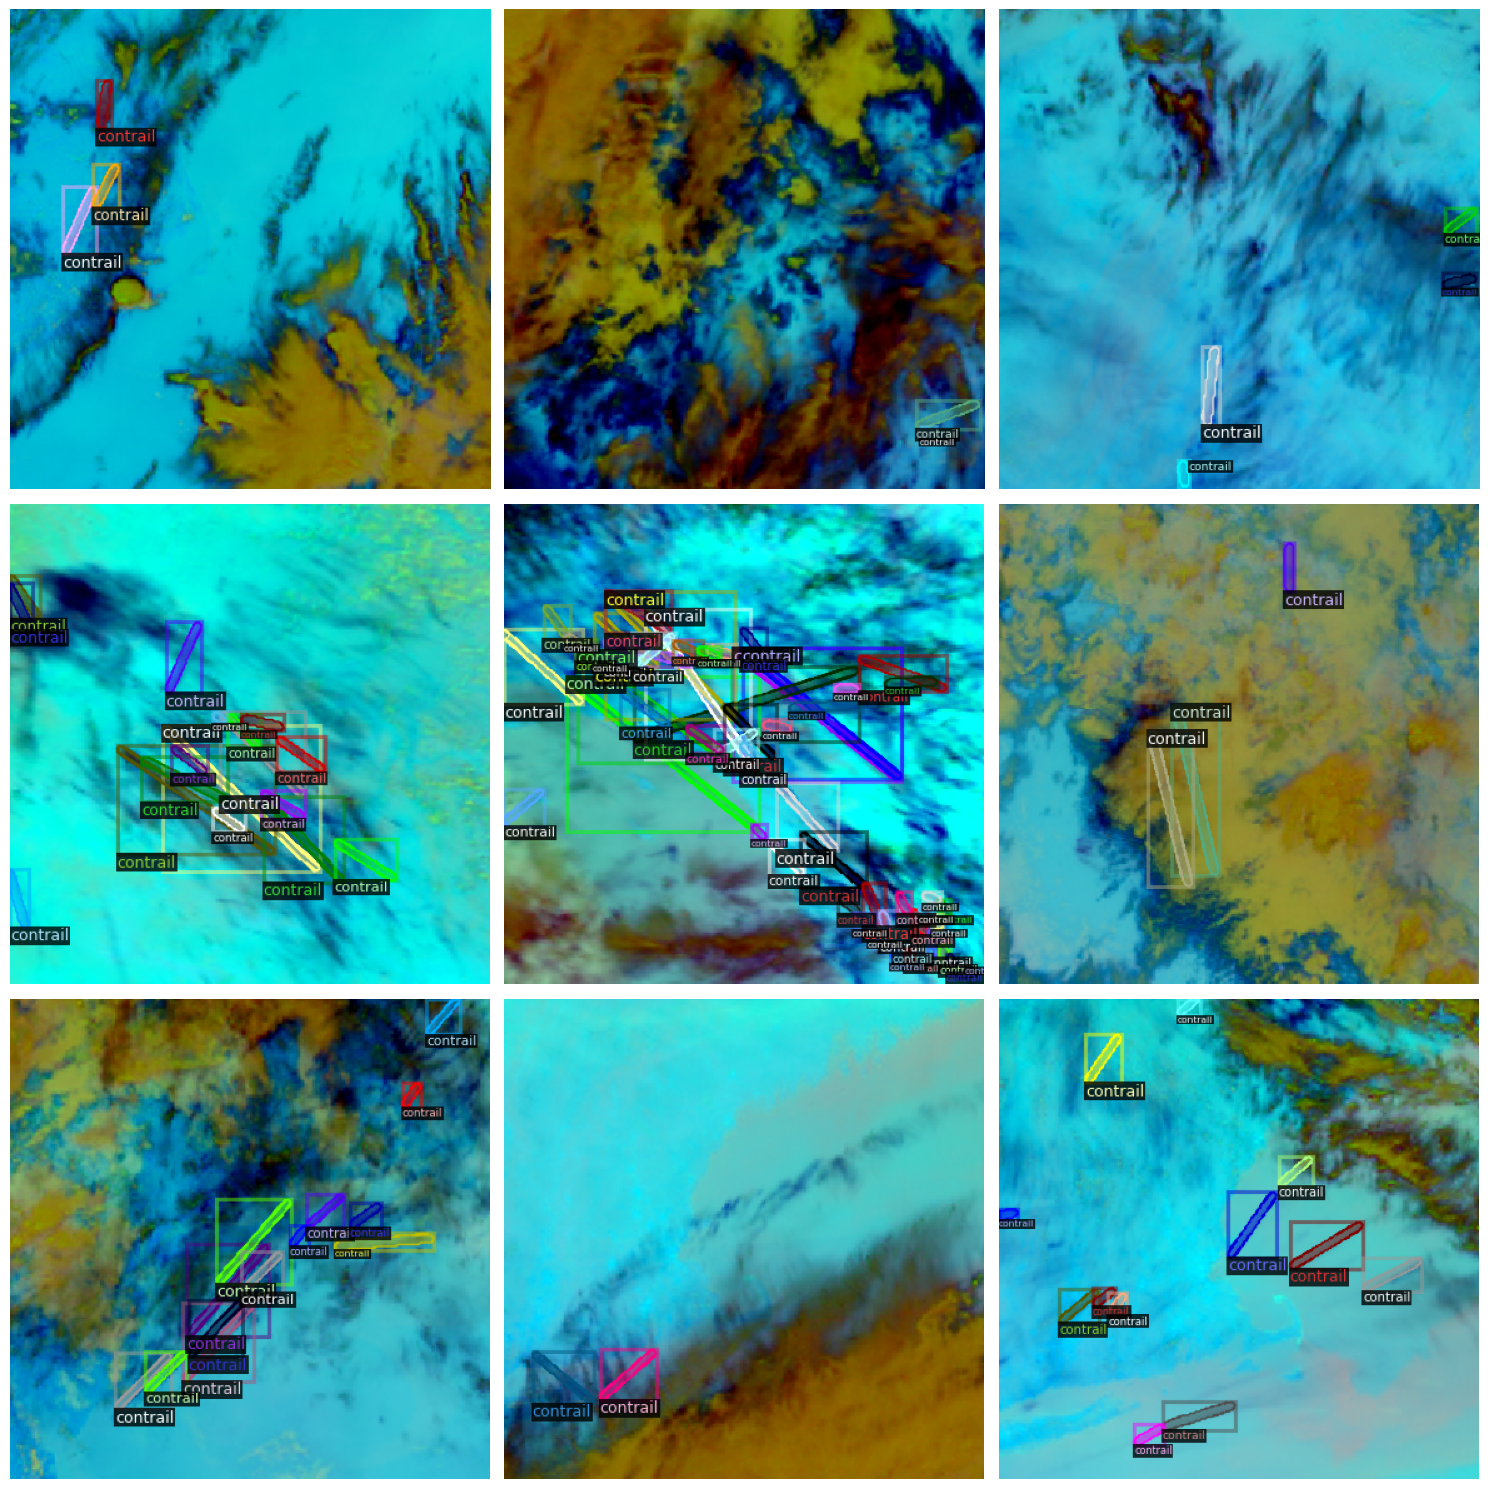

In [9]:
# Number of samples to display
num_samples = 9

# Create subplots: 3 rows × 3 columns
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Flatten axes array for easy iteration
axs = axs.flatten()

# Select random samples from the dataset
sampled_items = random.sample(dataset_dicts, num_samples)

for idx, data in enumerate(sampled_items):
    # Load the image from file
    image = cv2.imread(data["file_name"])
    filename_only = os.path.basename(data["file_name"])

    # Print the file name for reference
    print(f"Displaying: {filename_only}")

    # Initialize Detectron2 visualizer
    visualizer = Visualizer(image[:, :, ::-1], metadata=metadata, scale=1.5)
    
    # Draw annotations on the image
    output = visualizer.draw_dataset_dict(data)

    # Show image with annotations in the corresponding subplot
    axs[idx].imshow(output.get_image())
    axs[idx].axis("off")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
